In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import trilearn.distributions.discrete_dec_log_linear as loglin
import trilearn.distributions.g_inv_wishart as gwish
import trilearn.graph.christmas_tree_algorithm as cta
import trilearn.graph.decomposable
import trilearn.graph.graph
import trilearn.graph.graph as glib
import trilearn.smc as smc

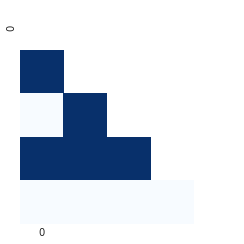

In [19]:
np.random.seed(4)
# Sample synthetic data
p = 5
n = 100
# sample graph
graph = trilearn.graph.decomposable.sample_decomposable_graph(p)
glib.plot_adjmat(graph)


In [20]:
# sample precision matrix
omega = gwish.sample(graph, p, np.matrix(np.identity(p)))
# sample normal data
x = np.matrix(np.random.multivariate_normal(np.zeros(p), omega.I, n))

/Users/felixwork/git/trilearn/env/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


In [21]:
# generate pgibbs trajectory
graph_traj = smc.particle_gibbs_ggm(X=x, alpha=0.5, beta=0.5, n_particles=50,
                                    traj_length=100, D=np.identity(p), delta=1.0,
                                    radius=p)


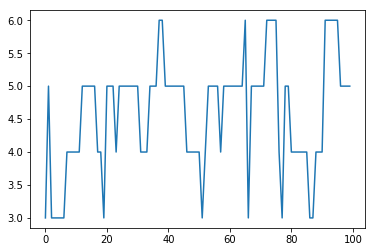

In [22]:
graph_traj.autocorrelation_size().plot()

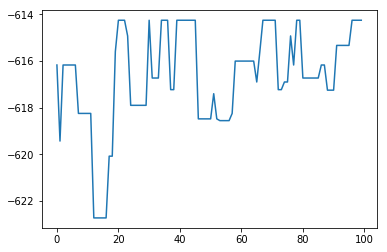

In [23]:
graph_traj.likelihood().plot()

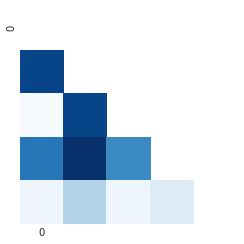

In [25]:
graph_traj.plot_heatmap(from_index=20)